In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
if __name__ == '__main__':
    env = gym.make("Blackjack-v1")
    EPS = 0.05
    GAMMA = 1.0

    Q = {}
    agentSumSpace = [i for i in range(4, 22)]
    dealerShowCardSpace = [i+1 for i in range(10)]
    agentAceSpace = [False, True]
    actionSpace = [0, 1] # stick or hit

    stateSpace = []
    returns = {}
    pairsVisited = {}
    for total in agentSumSpace:
        for card in dealerShowCardSpace:
            for ace in agentAceSpace:
                for action in agentAceSpace:
                    Q[((total, card, ace), action)] = 0
                    returns[((total, card, ace), action)] = 0
                    pairsVisited[((total, card, ace), action)] = 0
                stateSpace.append((total, card, ace))

    policy = {}
    for state in stateSpace:
        policy[state] = np.random.choice(actionSpace)

In [4]:
    numEpisodes = 5000000
    for i in tqdm(range(numEpisodes)):
        statesActionsReturns = []
        memory = []
        if i % 100000 == 0:
            print("starting episode", i)
        observation = env.reset()
        done = False
        while not done:
            action = policy[observation]
            observation_, reward, done, info = env.step(action)
            memory.append((observation[0], observation[1], observation[2], action, reward))
            observation = observation_
        memory.append((observation[0], observation[1], observation[2], action, reward)) #Quando l'episodio è finalmente finito lo mettiamo in memoria

        G = 0
        last = True
        for playerSum, dealerCard, usableAce, action, reward in reversed(memory):
            if last:
                last = False
            else:
                statesActionsReturns.append((playerSum, dealerCard, usableAce, action, G))
            G = GAMMA*G + reward

        statesActionsReturns.reverse()
        statesActionsVisited = []

        for playerSum, dealerCard, usableAce, action, G in statesActionsReturns:
            sa = ((playerSum, dealerCard, usableAce), action)
            if sa not in statesActionsVisited:
                pairsVisited[sa] += 1
                # Incremental implementation
                # new estimate = 1/N * [sample - old estimate]
                returns[(sa)] += (1 / pairsVisited[(sa)])*(G-returns[(sa)])
                Q[sa] = returns[sa]
                rand = np.random.random()
                if rand < 1 - EPS:
                    state = (playerSum, dealerCard, usableAce)
                    values = np.array([Q[(state, a)] for a in actionSpace])
                    best = np.random.choice(np.where(values==values.max())[0])
                    policy[state] = actionSpace[best]
                else:
                    policy[state] = np.random.choice(actionSpace)
                statesActionsVisited.append(actionSpace)

        if EPS - 1e-7 > 0:
            EPS -= 1e-7
        else:
            EPS = 0

  0%|          | 3024/5000000 [00:00<08:15, 10091.08it/s]

starting episode 0


  2%|▏         | 101590/5000000 [00:10<08:10, 9984.58it/s]

starting episode 100000


  4%|▍         | 202051/5000000 [00:20<07:53, 10131.98it/s]

starting episode 200000


  6%|▌         | 302037/5000000 [00:30<07:47, 10041.85it/s]

starting episode 300000


  8%|▊         | 401221/5000000 [00:40<07:38, 10032.22it/s]

starting episode 400000


 10%|█         | 501997/5000000 [00:50<07:24, 10123.58it/s]

starting episode 500000


 12%|█▏        | 601387/5000000 [01:00<07:12, 10171.42it/s]

starting episode 600000


 14%|█▍        | 701910/5000000 [01:10<07:07, 10060.25it/s]

starting episode 700000


 16%|█▌        | 801243/5000000 [01:19<07:04, 9884.22it/s] 

starting episode 800000


 18%|█▊        | 901323/5000000 [01:29<06:54, 9888.39it/s] 

starting episode 900000


 20%|██        | 1002538/5000000 [01:39<06:36, 10073.46it/s]

starting episode 1000000


 22%|██▏       | 1102839/5000000 [01:49<06:27, 10054.20it/s]

starting episode 1100000


 24%|██▍       | 1202210/5000000 [01:59<06:14, 10139.15it/s]

starting episode 1200000


 26%|██▌       | 1301615/5000000 [02:09<06:09, 10008.37it/s]

starting episode 1300000


 28%|██▊       | 1402933/5000000 [02:19<05:52, 10192.18it/s]

starting episode 1400000


 30%|███       | 1501279/5000000 [02:29<05:45, 10112.68it/s]

starting episode 1500000


 32%|███▏      | 1602665/5000000 [02:39<05:34, 10161.66it/s]

starting episode 1600000


 34%|███▍      | 1701104/5000000 [02:49<05:26, 10112.43it/s]

starting episode 1700000


 36%|███▌      | 1803496/5000000 [02:59<05:16, 10089.37it/s]

starting episode 1800000


 38%|███▊      | 1902668/5000000 [03:09<05:04, 10159.61it/s]

starting episode 1900000


 40%|████      | 2002088/5000000 [03:19<04:57, 10079.48it/s]

starting episode 2000000


 42%|████▏     | 2101510/5000000 [03:29<04:48, 10061.94it/s]

starting episode 2100000


 44%|████▍     | 2201926/5000000 [03:39<04:36, 10124.44it/s]

starting episode 2200000


 46%|████▌     | 2302895/5000000 [03:49<04:32, 9901.16it/s] 

starting episode 2300000


 48%|████▊     | 2401429/5000000 [03:58<04:20, 9985.54it/s] 

starting episode 2400000


 50%|█████     | 2502723/5000000 [04:09<04:26, 9360.75it/s] 

starting episode 2500000


 52%|█████▏    | 2602226/5000000 [04:20<04:40, 8535.15it/s] 

starting episode 2600000


 54%|█████▍    | 2701114/5000000 [04:29<03:49, 10027.88it/s]

starting episode 2700000


 56%|█████▌    | 2802309/5000000 [04:39<03:36, 10155.46it/s]

starting episode 2800000


 58%|█████▊    | 2901985/5000000 [04:49<03:26, 10152.96it/s]

starting episode 2900000


 60%|██████    | 3002115/5000000 [04:59<03:15, 10226.44it/s]

starting episode 3000000


 62%|██████▏   | 3102940/5000000 [05:09<03:06, 10169.74it/s]

starting episode 3100000


 64%|██████▍   | 3202702/5000000 [05:19<02:58, 10079.99it/s]

starting episode 3200000


 66%|██████▌   | 3302424/5000000 [05:29<02:48, 10101.98it/s]

starting episode 3300000


 68%|██████▊   | 3402224/5000000 [05:39<02:36, 10219.96it/s]

starting episode 3400000


 70%|███████   | 3502112/5000000 [05:49<02:31, 9914.98it/s] 

starting episode 3500000


 72%|███████▏  | 3601192/5000000 [05:58<02:19, 10040.29it/s]

starting episode 3600000


 74%|███████▍  | 3702932/5000000 [06:09<02:07, 10171.78it/s]

starting episode 3700000


 76%|███████▌  | 3805916/5000000 [06:19<01:57, 10172.80it/s]

starting episode 3800000


 78%|███████▊  | 3901157/5000000 [06:28<01:46, 10324.44it/s]

starting episode 3900000


 80%|████████  | 4002130/5000000 [06:38<01:38, 10142.10it/s]

starting episode 4000000


 82%|████████▏ | 4102223/5000000 [06:48<01:28, 10161.95it/s]

starting episode 4100000


 84%|████████▍ | 4202088/5000000 [06:58<01:18, 10162.30it/s]

starting episode 4200000


 86%|████████▌ | 4301777/5000000 [07:08<01:09, 10102.73it/s]

starting episode 4300000


 88%|████████▊ | 4401753/5000000 [07:17<00:58, 10143.10it/s]

starting episode 4400000


 90%|█████████ | 4502146/5000000 [07:28<00:50, 9889.49it/s] 

starting episode 4500000


 92%|█████████▏| 4603755/5000000 [07:38<00:39, 10072.37it/s]

starting episode 4600000


 94%|█████████▍| 4701595/5000000 [07:47<00:29, 10161.49it/s]

starting episode 4700000


 96%|█████████▌| 4802492/5000000 [07:57<00:19, 10225.57it/s]

starting episode 4800000


 98%|█████████▊| 4901412/5000000 [08:07<00:09, 10234.52it/s]

starting episode 4900000


100%|██████████| 5000000/5000000 [08:17<00:00, 10051.25it/s]


getting ready to test policy
win rate  0.454  loss rate  0.49  draw rate  0.056


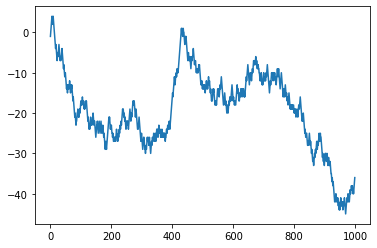

In [15]:
    numEpisodes = 1000
    rewards = np.zeros(numEpisodes)
    totalReward = 0
    wins = 0
    losses = 0
    draws = 0
    print("getting ready to test policy")
    for i in range(numEpisodes):
        observation = env.reset()
        done = False
        while not done:
            action = policy[observation]
            observation_, reward, done, info = env.step(action)
            observation = observation_
        totalReward += reward
        rewards[i] = totalReward

        if reward >= 1:
            wins += 1
        elif reward == 0:
            draws += 1
        elif reward == -1:
            losses += 1

    wins /= numEpisodes
    losses /= numEpisodes
    draws /= numEpisodes
    print("win rate ", wins, " loss rate ", losses, " draw rate ", draws)
    plt.plot(rewards)
    plt.show()